In [6]:
import numpy as np

class BasicNeuron:
    def __init__(self, num_inputs, activation_function):
        self.weights = np.random.rand(num_inputs)
        self.bias = np.random.rand(1)
        self.activation_function = activation_function

    def forward(self, inputs):
        inputs = np.asarray(inputs).reshape(-1)
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        output = self.activation_function(weighted_sum)
        return output

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Create a neuron with 3 inputs and sigmoid activation
neuron = BasicNeuron(3, sigmoid)

# Example inputs
inputs = np.array((0.6, 0.2, 0.9))

# Get neuron output
output = neuron.forward(inputs)
print("Neuron Output:", output)


Neuron Output: [0.67491652]


In [7]:
def step_function(x):
  return int(x[0]) if x >= 0 else 0

class Perceptron:
  def __init__(self, num_inputs, learning_rate=0.01):
    self.neuron = BasicNeuron(num_inputs, step_function)
    self.learning_rate = learning_rate

  def predict(self, inputs):
    return self.neuron.forward(inputs)

  def train(self, training_inputs, labels, epochs=10):
    for epoch in range(epochs):
      l=[]
      for inputs, label in zip(training_inputs, labels):
        prediction = self.predict(inputs)
        error = label - prediction
        l.append(error)
        # Perceptron learning rule update
        self.neuron.weights += self.learning_rate * error * inputs
        self.neuron.bias += self.learning_rate * error
      #print('error',sum(l)/len(l))

        # McCulloch and Pits
        # Rosenblatts perceptron

In [8]:
!pip install tensorflow

In [9]:
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train , y_train), (x_test, y_test) = mnist.load_data()


c:\Users\rrpra\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\rrpra\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\rrpra\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [10]:
import tkinter as tk

root = tk.Tk()
dpi = root.winfo_fpixels('1i')  # 1 inch in pixels
root.destroy()

print(f"Screen DPI: {dpi}")


Screen DPI: 96.09458128078816


<class 'numpy.ndarray'> (60000, 28, 28)


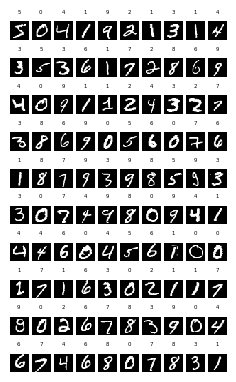

In [11]:
import matplotlib.pyplot as plt
print(type(x_train), x_train.shape)
n_rows, n_cols = 3, 3
img_size = x_train.shape[1]
imsize_inch = img_size / dpi

n_rows, n_cols = 10, 10
fig_width = n_cols * (imsize_inch + 0.2*1)
fig_height = n_rows * (imsize_inch + 0.4*0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_height, fig_width) ,dpi=dpi)

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i],cmap='gray',interpolation='nearest')
    ax.set_title(f'{y_train[i]}',fontsize=4)
    ax.axis('off')

#plt.tight_layout()
plt.show()



In [12]:
images = x_train
labels = y_train
digit_subsets = { d: images [labels == d]for d in range(10)}

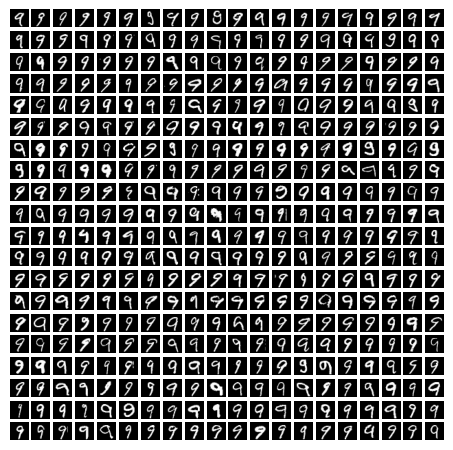

In [13]:
digit = 9
n_cols, n_rows = 20,20
fig_height = fig_width = n_cols * imsize_inch
fig, axes = plt.subplots(n_rows, n_cols, figsize=(fig_height, fig_width),dpi=dpi)

for i, ax in enumerate(axes.flatten()):
    ax.imshow(digit_subsets[digit][i], cmap='gray')
    ax.axis('off')

#plt.tight_layout()
plt.show()


In [14]:
# download the cats and dogs dataset from thelink .Load the adtaset on google collab
# If the datset is not loadable in its original size , use the portion of the datset . Us ethe maximal portion of the datset that is loadable in the collab environment
# In such a case ensure that the portion of the datset loaded on to memory contains equal distribution of cats and dogs
#  Train a perceptron to classify the images into cats and dogs
#  Start with the training testing split ratioas 80 20
#  Chnage this ratio from 10 : 90 to 90 : 10 in steps of 10 percent
#  do not use library functions for train test split
#  Split the training dataset in ratios of 10 : 90 to 90 : 10(By decreasing te other class)
#

In [54]:
x_train_reshaped = x_train.reshape(x_train.shape[0], 28 * 28)
x_test_reshaped = x_test.reshape(x_test.shape[0] ,28 *28)
# reshaping

x_train_normalized = x_train_reshaped / 255.0
x_test_normalized = x_test_reshaped / 255.0
# range normalisation or min-max normalisation

target_digit = 5
y_train_binary = (y_train == target_digit).astype(int)
y_test_binary = (y_test == target_digit).astype(int)

print("Training Data shape:", x_train_normalized.shape)
print("Trainin label shape:", y_train_binary.shape)
print("Test Data shape:", x_test_normalized.shape)
print("Test Labels shape:", y_test_binary.shape)
print("number for positive", sum(y_test_binary))


Training Data shape: (60000, 784)
Trainin label shape: (60000,)
Test Data shape: (10000, 784)
Test Labels shape: (10000,)
number for positive 892


In [16]:
num_inputs = x_train_normalized.shape[1]
perceptron = Perceptron(num_inputs , learning_rate=0.01)

epochs = 10

perceptron.train(x_train_normalized, y_train_binary, epochs)

print("Perceptron training complete")

Perceptron training complete


In [17]:
import numpy as np
all_labels , all_counts = np.unique(y_train, return_counts=True)
print({int(all_labels[i]):int(all_counts[i]) for i in range(len(all_labels))})
all_labels , all_counts = np.unique(y_test, return_counts=True)
print({int(all_labels[i]):int(all_counts[i]) for i in range(len(all_labels))})

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
{0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [18]:
tt = 0
tt5 = 0

for i in range(len(x_test_normalized)):
    pred = perceptron.predict(x_test_normalized[i])
    if pred == y_test_binary[i]:
        if y_test_binary[i]==1:
            tt5+=1
        else:
            tt+=1
    #print(y_test_binary[i], pred)
print(tt,tt5)

9055 410


In [53]:
# Generate predictions for the test data
predictions = np.array([perceptron.predict(inputs) for inputs in x_test_normalized])

y_true = y_test_binary

for cls in [0, 1]:

  # mask of samples whose true label is 'cls'
  mask = (y_true == cls)

  # number of samples in that class
  n_cls = np.sum(mask)

  # number of correct predictions among them
  correct_cls = np.sum(predictions[mask] == cls)

  # accuracy for this class
  acc_cls = correct_cls / n_cls

  print(f"Accuracy for class {cls}: {acc_cls:.4f}   ({correct_cls} / {n_cls})")

Accuracy for class 0: 0.9942   (9055 / 9108)
Accuracy for class 1: 0.4596   (410 / 892)


In [58]:
all_images_normalized = np.concatenate([x_train_normalized, x_test_normalized])
labels = np.concatenate([y_train_binary, y_test_binary])

In [59]:
print(all_images_normalized.shape)
print(labels.shape)

(70000, 784)
(70000,)


In [ ]:
def test_atdiffrent_ration(x_data,y_data):
  for i in range(1,10):
    per = .1*i
    num_selected = int(per * x_data.shape[0])
    arr = np.random.choice(x_data.shape[0], num_selected, replace=False)
    x_train,y_train = x_data[arr], y_data[arr]
    x_test,y_test = x_data[~arr], y_data[~arr]
    print(f"train percentage {round(per*100,0)}% data shape are:-x_train:-{x_train.shape},y_train:-{y_train.shape},x_test:-{x_test.shape},y_test:-{y_test.shape}")
    model = Perceptron(x_train.shape[1])
    model.train(x_train,y_train,20)
    # Generate predictions for the test data
    predictions = np.array([model.predict(inputs) for inputs in x_test])

    y_true = y_test

    for cls in [0, 1]:

      # mask of samples whose true label is 'cls'
      mask = (y_true == cls)

      # number of samples in that class
      n_cls = np.sum(mask)

      # number of correct predictions among them
      correct_cls = np.sum(predictions[mask] == cls)
      wrong_cls = np.sum(predictions[~mask] == cls)

      # accuracy for this class
      acc_cls = correct_cls / n_cls

      print(f"Accuracy for class {'cat' if y_data[i] else 'dog'}: {acc_cls:.4f}   ({correct_cls} / {n_cls}), wrong prediction {wrong_cls}, total data {len(y_true)}")

In [45]:
class Neuron():
    def __init__(self,num_perceptrons, num_inputs):
        self.perceptrons = []
        for i in range(num_perceptrons):
            self.perceptrons.append(Perceptron(num_inputs))
        self.model = Perceptron(num_perceptrons)
    def train(self,x_data,y_data,epochs = 10):
        for perceptron in self.perceptrons:
            perceptron.train(x_data,y_data,epochs)
        inputs=[]
        for i,data in enumerate(x_data):
            prediction = [perceptron.predict(data) for perceptron in self.perceptrons]
            inputs.append(prediction)
        inputs = np.array(inputs)
        self.model.train(inputs, y_data,epochs)
    def predict(self, x_data):
        prediction = np.array([perceptron.predict(x_data) for perceptron in self.perceptrons])
        return self.model.predict(prediction)

In [40]:
model = Neuron(5, all_images_normalized.shape[1])
model.train_neuron(all_images_normalized,labels)


0
0


In [96]:
def test_neuron_at_diffrent_ration(x_data,y_data):
  model = Neuron(100, x_data.shape[1])
  for i in range(1,10):
    per = .1*i
    num_selected = int(per * x_data.shape[0])
    arr = np.array(range(0,x_data.shape[0]))
    mask = np.random.choice(arr,num_selected,replace=False)
    arr = np.array([arr[i] in mask for i in range(len(arr))])
    x_train,y_train = x_data[arr], y_data[arr]
    x_test,y_test = x_data[~arr], y_data[~arr]
    print(f"train percentage {round(per*100,0)}% data shape are:-x_train:-{x_train.shape},y_train:-{y_train.shape},x_test:-{x_test.shape},y_test:-{y_test.shape}")
    model = Perceptron(x_train.shape[1])
    model.train(x_train,y_train,20)
    # Generate predictions for the test data
    predictions = np.array([model.predict(inputs) for inputs in x_test])

    y_true = y_test

    for cls in [0, 1]:

      # mask of samples whose true label is 'cls'
      mask = (y_true == cls)

      # number of samples in that class
      n_cls = np.sum(mask)

      # number of correct predictions among them
      correct_cls = np.sum(predictions[mask] == cls)
      wrong_cls = np.sum(predictions[~mask] == cls)

      # accuracy for this class
      acc_cls = correct_cls / n_cls

      print(f"Accuracy for class {'cat' if y_data[i] else 'dog'}: {acc_cls:.4f}   ({correct_cls} / {n_cls}), wrong prediction {wrong_cls}, total data {len(y_true)}")

In [97]:
test_neuron_at_diffrent_ration(all_images_normalized,labels)

train percentage 10.0% data shape are:-x_train:-(7000, 784),y_train:-(7000,),x_test:-(63000, 784),y_test:-(63000,)
Accuracy for class dog: 0.9847   (56464 / 57339), wrong prediction 2426, total data 63000
Accuracy for class dog: 0.5361   (3035 / 5661), wrong prediction 846, total data 63000
train percentage 20.0% data shape are:-x_train:-(14000, 784),y_train:-(14000,),x_test:-(56000, 784),y_test:-(56000,)
Accuracy for class dog: 0.9944   (50663 / 50950), wrong prediction 3765, total data 56000
Accuracy for class dog: 0.2436   (1230 / 5050), wrong prediction 277, total data 56000
train percentage 30.0% data shape are:-x_train:-(21000, 784),y_train:-(21000,),x_test:-(49000, 784),y_test:-(49000,)
Accuracy for class dog: 0.9602   (42812 / 44586), wrong prediction 1346, total data 49000
Accuracy for class dog: 0.5786   (2554 / 4414), wrong prediction 1738, total data 49000
train percentage 40.0% data shape are:-x_train:-(28000, 784),y_train:-(28000,),x_test:-(42000, 784),y_test:-(42000,)
Ac

In [65]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

for i in range(1,10):
    # Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(all_images_normalized, labels, test_size=0.1*i, random_state=42)

    # Standardize features (important for MLP performance!)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create the neural network
    mlp = MLPClassifier(
        hidden_layer_sizes=(100, ),   # one hidden layer with 100 neurons
        activation='relu',            # or 'tanh', 'logistic'
        solver='adam',                # or 'sgd'
        max_iter=200,                 # increase if needed
        random_state=42
    )

    # Train the model
    mlp.fit(X_train, y_train)

    # Predict
    y_pred = mlp.predict(X_test)

    # Evaluate
    print("split ratio:- ",i*10,"% Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


split ratio:-  10 % Accuracy: 0.9948571428571429
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6342
           1       0.98      0.97      0.97       658

    accuracy                           0.99      7000
   macro avg       0.99      0.98      0.98      7000
weighted avg       0.99      0.99      0.99      7000

split ratio:-  20 % Accuracy: 0.994
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12727
           1       0.98      0.96      0.97      1273

    accuracy                           0.99     14000
   macro avg       0.99      0.98      0.98     14000
weighted avg       0.99      0.99      0.99     14000

split ratio:-  30 % Accuracy: 0.9939526689205276
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19086
           1       0.98      0.